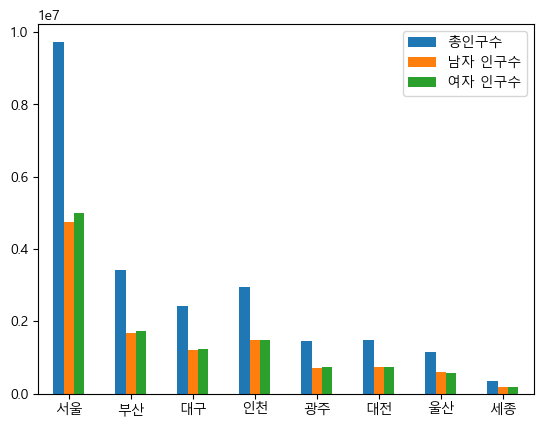

In [4]:
# 1)서울,부산,대구,인천,광주,대전, 울산, 세종 의 총인구수, 남자인구수, 여자인구수를 시각화
# 1. 파일 읽기 2. 리스트 만들기 3. 리스트 전치하기 4. 딕셔너리 만들기 5. 데이터프레임 만들기  6.시각화하기

import csv
import pandas as pd
from matplotlib import rc

rc('font',family='Malgun Gothic')

def get_list(list_data):
    f = open('population_2020.csv','r',encoding='utf-8')
    lines = csv.reader(f)
    header = next(lines)
    list_temp = []
    for line in lines:
        list_temp.append(line[:])
    for j in range(7):
        temp = []
        for i in range(len(list_temp)):
            temp.append(list_temp[i][j])
        list_data.append(temp)

def get_area(data):
    temp = []
    for x in data:
        arr = x.split()
        temp.append(arr[0])
    return temp

def del_comma(data,type):
    temp = []
    for x in data:
        strtmp = ''
        arr = x.split(',')
        for i in range(len(arr)):
            strtmp += arr[i]
        if type == 'integer':
            temp.append(int(strtmp))
        else:
            temp.append(float(strtmp))
    return temp

def get_dict(list_data,keys,dict_data):
    area = get_area(list_data[0])
    dict_data.update({keys[0]:area})
    for i in range(1,7):
        if i == 3 or i == 6:
            data = del_comma(list_data[i],'float')
        else:
            data = del_comma(list_data[i],'int')
        dict_data.update({keys[i]:data})
        

list_data = []
get_list(list_data)
dict_data = {}
keys = ['지역','총인구수','세대수','세대당 인구','남자 인구수', '여자 인구수','남여 비율']
get_dict(list_data,keys,dict_data)

df = pd.DataFrame(dict_data)

x1 = df.iloc[:8,1]
x1 = x1.values.tolist()
x2 = df.iloc[:8,4]
x2 = x2.values.tolist()
x3 = df.iloc[:8,5]
x3 = x3.values.tolist()
datatmp = pd.DataFrame({'총인구수': x1, '남자 인구수': x2, '여자 인구수': x3}, index=['서울','부산','대구','인천','광주','대전','울산','세종'])
ax = datatmp.plot.bar(rot = 0)        